In [1]:
import sys
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import requests
# variable_name = pd.read_csv(‘file path’)

In [3]:
variable_name = pd.read_csv("https://raw.githubusercontent.com/faschmar/SICSS-2022-aag-no15_filter_bubble_effect/65ca3346eddfb176bc692b318f8062d7df106c19/results/tweets_senators_sentiment_merged_2022-07-27.csv")

In [4]:
variable_name

,created_at,id,text,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo,vader_sentiment_score,vader_sentiment_phrase,Twitter,Name,Link,State,Party,text_separated
0,2022-07-23 13:40:00+00:00,1550838139203096578,There are so-called leaders across this countr...,224285242,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""urls"":[{""start"":263,""end"":286,""url"":""https:/...",NaN,"[{""media_key"":""13_1550833604804083712"",""type"":...",NaN,-0.6486,negative,senatorbennet,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,Democrat,"There, are, so-called, leaders, across, this, ..."
1,2022-07-21 14:40:31+00:00,1550128595489591306,It's clear: reproductive health care is under ...,224285242,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":209,""end"":217,""probab...",NaN,NaN,NaN,0.8591,positive,senatorbennet,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,Democrat,"It's, clear:, reproductive, health, care, is, ..."
2,2022-07-14 17:42:52+00:00,1547637767353483267,It wasn't enough to strip away the fundamental...,224285242,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""urls"":[{""start"":281,""end"":304,""url"":""https:/...",NaN,"[{""media_key"":""13_1547637356315914240"",""type"":...",NaN,0.9412,positive,senatorbennet,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,Democrat,"It, wasn't, enough, to, strip, away, the, fund..."
3,2022-07-14 14:58:44+00:00,1547596463424692224,I'm speaking on the Senate floor to urge my co...,224285242,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":20,""end"":25,""probabil...",NaN,NaN,NaN,0.8910,positive,senatorbennet,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,Democrat,"I'm, speaking, on, the, Senate, floor, to, urg..."
4,2022-07-13 14:55:28+00:00,1547233251663781889,"Following the Supreme Court’s Dobbs ruling, mi...",224285242,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":14,""end"":26,""probabil...",NaN,NaN,NaN,0.8442,positive,senatorbennet,"Bennet, Michael F.",https://twitter.com/SenatorBennet,CO,Democrat,"Following, the, Supreme, Court’s, Dobbs, rulin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,2022-06-24 14:47:47+00:00,1540345948626354176,A woman’s health care decisions should be betw...,1080844782,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":112,""end"":122,""probab...",NaN,NaN,NaN,0.4939,positive,senatorsinema,"Sinema, Kyrsten",https://twitter.com/SenatorSinema,AZ,Democrat,"A, woman’s, health, care, decisions, should, b..."
1327,2022-06-24 14:44:58+00:00,1540345240137060352,"Today, @SCOTUS reversed its 1973 Roe v. Wade d...",21111098,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""urls"":[{""start"":239,""end"":262,""url"":""https:/...",NaN,NaN,NaN,0.8910,positive,senshelby,"Shelby, Richard C.",https://twitter.com/SenShelby,AL,Republican,"Today,, @SCOTUS, reversed, its, 1973, Roe, v.,..."
1328,2022-06-24 14:35:16+00:00,1540342798947328002,Today is a day for which millions of Americans...,296361085,NaN,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":37,""end"":45,""probabil...",NaN,NaN,NaN,0.7351,positive,senjohnthune,"Thune, John",https://twitter.com/SenJohnThune,SD,Republican,"Today, is, a, day, for, which, millions, of, A..."
1329,2022-06-24 14:30:43+00:00,1540341655437561858,Precedents that are wrongly decided should be ...,221162525,221162525.0,en,"{""entities"":{""url"":{""urls"":[{""start"":0,""end"":2...","{""annotations"":[{""start"":126,""end"":133,""probab...","[{""type"":""replied_to"",""id"":""154034165360455680...",NaN,NaN,0.5859,positive,sentoomey,"Toomey, Patrick J.",https://twitter.com/SenToomey,PA,Republican,"Precedents, that, are, wrongly, decid

In [7]:
df = variable_name[["Name","Party","State","Twitter","text","id","vader_sentiment_score","vader_sentiment_phrase","text_separated"]]

In [8]:
df

,Name,Party,State,Twitter,text,id,vader_sentiment_score,vader_sentiment_phrase,text_separated
0,"Bennet, Michael F.",Democrat,CO,senatorbennet,There are so-called leaders across this countr...,1550838139203096578,-0.6486,negative,"There, are, so-called, leaders, across, this, ..."
1,"Bennet, Michael F.",Democrat,CO,senatorbennet,It's clear: reproductive health care is under ...,1550128595489591306,0.8591,positive,"It's, clear:, reproductive, health, care, is, ..."
2,"Bennet, Michael F.",Democrat,CO,senatorbennet,It wasn't enough to strip away the fundamental...,1547637767353483267,0.9412,positive,"It, wasn't, enough, to, strip, away, the, fund..."
3,"Bennet, Michael F.",Democrat,CO,senatorbennet,I'm speaking on the Senate floor to urge my co...,1547596463424692224,0.8910,positive,"I'm, speaking, on, the, Senate, floor, to, urg..."
4,"Bennet, Michael F.",Democrat,CO,senatorbennet,"Following the Supreme Court’s Dobbs ruling, mi...",1547233251663781889,0.8442,positive,"Following, the, Supreme, Court’s, Dobbs, rulin..."
...,...,...,...,...,...,...,...,...,...
1326,"Sinema, Kyrsten",Democrat,AZ,senatorsinema,A woman’s health care decisions should be betw...,1540345948626354176,0.4939,positive,"A, woman’s, health, care, decisions, should, b..."
1327,"Shelby, Richard C.",Republican,AL,senshelby,"Today, @SCOTUS reversed its 1973 Roe v. Wade d...",1540345240137060352,0.8910,positive,"Today,, @SCOTUS, reversed, its, 1973, Roe, v.,..."
1328,"Thune, John",Republican,SD,senjohnthune,Today is a day for which millions of Americans...,1540342798947328002,0.7351,positive,"Today, is, a, day, for, which, millions, of, A..."
1329,"Toomey, Patrick J.",Republican,PA,sentoomey,Precedents that are wrongly decided should be ...,1540341655437561858,0.5859,positive,"Precedents, that, are, wrongly, decided, shoul..."


In [10]:
republicans=df.loc[(df["Party"] == "Republican")]

In [11]:
republicans

,Name,Party,State,Twitter,text,id,vader_sentiment_score,vader_sentiment_phrase,text_separated
48,"Cassidy, Bill",Republican,LA,senbillcassidy,RT @cnsnews: .@SenBillCassidy says abortion is...,1550167936610045956,0.0000,neutral,"RT, @cnsnews:, .@SenBillCassidy, says, abortio..."
49,"Cassidy, Bill",Republican,LA,senbillcassidy,RT @FRCdc: Washington D.C. has no limit on abo...,1547239319840096257,-0.2960,negative,"RT, @FRCdc:, Washington, D.C., has, no, limit,..."
50,"Cassidy, Bill",Republican,LA,senbillcassidy,"Being Pro-Life is not extreme, defending abort...",1545472373083852803,0.6124,positive,"Being, Pro-Life, is, not, extreme,, defending,..."
51,"Cassidy, Bill",Republican,LA,senbillcassidy,The president's call to destroy Senate rules o...,1542524828451803137,-0.8519,negative,"The, president's, call, to, destroy, Senate, r..."
52,"Cassidy, Bill",Republican,LA,senbillcassidy,Today’s decision recognizes that an unborn chi...,1540345835619340288,0.0000,neutral,"Today’s, decision, recognizes, that, an, unbor..."
...,...,...,...,...,...,...,...,...,...
1325,"Young, Todd",Republican,IN,sentoddyoung,Today is a monumental day for the protection o...,1540353144563109888,-0.0258,neutral,"Today, is, a, monumental, day, for, the, prote..."
1327,"Shelby, Richard C.",Republican,AL,senshelby,"Today, @SCOTUS reversed its 1973 Roe v. Wade d...",1540345240137060352,0.8910,positive,"Today,, @SCOTUS, reversed, its, 1973, Roe, v.,..."
1328,"Thune, John",Republican,SD,senjohnthune,Today is a day for which millions of Americans...,1540342798947328002,0.7351,positive,"Today, is, a, day, for, which, millions, of, A..."
1329,"Toomey, Patrick J.",Republican,PA,sentoomey,Precedents that are wrongly decided should be ...,1540341655437561858,0.5859,positive,"Precedents, that, are, wrongly, decided, shoul..."


In [36]:
republicans.to_csv('republicans.csv')

In [12]:
Democarats=df.loc[(df["Party"] == "Democrat")]

In [13]:
Democarats

,Name,Party,State,Twitter,text,id,vader_sentiment_score,vader_sentiment_phrase,text_separated
0,"Bennet, Michael F.",Democrat,CO,senatorbennet,There are so-called leaders across this countr...,1550838139203096578,-0.6486,negative,"There, are, so-called, leaders, across, this, ..."
1,"Bennet, Michael F.",Democrat,CO,senatorbennet,It's clear: reproductive health care is under ...,1550128595489591306,0.8591,positive,"It's, clear:, reproductive, health, care, is, ..."
2,"Bennet, Michael F.",Democrat,CO,senatorbennet,It wasn't enough to strip away the fundamental...,1547637767353483267,0.9412,positive,"It, wasn't, enough, to, strip, away, the, fund..."
3,"Bennet, Michael F.",Democrat,CO,senatorbennet,I'm speaking on the Senate floor to urge my co...,1547596463424692224,0.8910,positive,"I'm, speaking, on, the, Senate, floor, to, urg..."
4,"Bennet, Michael F.",Democrat,CO,senatorbennet,"Following the Supreme Court’s Dobbs ruling, mi...",1547233251663781889,0.8442,positive,"Following, the, Supreme, Court’s, Dobbs, rulin..."
...,...,...,...,...,...,...,...,...,...
1305,"Schumer, Charles E.",Democrat,NY,senschumer,Today is one of the darkest days our country h...,1540346034483871744,-0.1461,negative,"Today, is, one, of, the, darkest, days, our, c..."
1306,"Schumer, Charles E.",Democrat,NY,senschumer,The contrast between Democrats and MAGA Republ...,1529160601242685441,0.6906,positive,"The, contrast, between, Democrats, and, MAGA, ..."
1307,"Schumer, Charles E.",Democrat,NY,senschumer,RT @SenCortezMasto: Senate Republicans just bl...,1547670482043805699,0.7506,positive,"RT, @SenCortezMasto:, Senate, Republicans, jus..."
1308,"Schumer, Charles E.",Democrat,NY,senschumer,RT @SenCortezMasto: I introduced legislation t...,1546950157496901633,-0.2500,negative,"RT, @SenCortezMasto:, I, introduced, legislati..."


In [43]:
Democarats.to_csv('democrats.csv')

In [ ]:
#Wordclouds

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

In [40]:
text = open('rep.txt').read()
stopwords = set(STOPWORDS)
stop_words = ["https", "co", "t","and","a","to","the","amp","RT","S"]+list(STOPWORDS)

In [41]:
#Appearance-related
custom_mask = np.array(Image.open('republican-vector-logo.jpg')) 
wc = WordCloud(background_color = 'white', stopwords = stop_words,
               max_words=1000000,
               mask = custom_mask,
               min_font_size=1,
               contour_width = 0)

wc.generate(text)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

#Plotting
##plt.imshow(wc, interpolation = 'bilinear')
##plt.axis('off')
##plt.show()

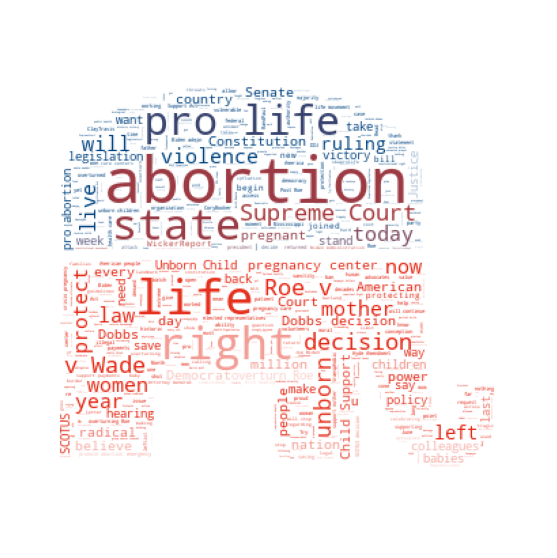

In [42]:
#Plotting
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.axis('off')
plt.show()

In [48]:
#Content-related
text1 = open('democ.txt').read()
stopwords = set(STOPWORDS)
stop_words1 = ["https", "co", "t","and","a","to","the","amp","RT","S"]+list(STOPWORDS)

In [50]:
#Appearance-related
custom_mask1 = np.array(Image.open('Picture 1.jpg')) 
wc = WordCloud(background_color = 'white', stopwords=stop_words1,
               max_words=1000,
               mask = custom_mask1,
               min_font_size=1,
               contour_width = 0)

wc.generate(text1)
image_colors = ImageColorGenerator(custom_mask1)
wc.recolor(color_func = image_colors)

#Plotting
##plt.imshow(wc, interpolation = 'bilinear')
##plt.axis('off')
##plt.show()

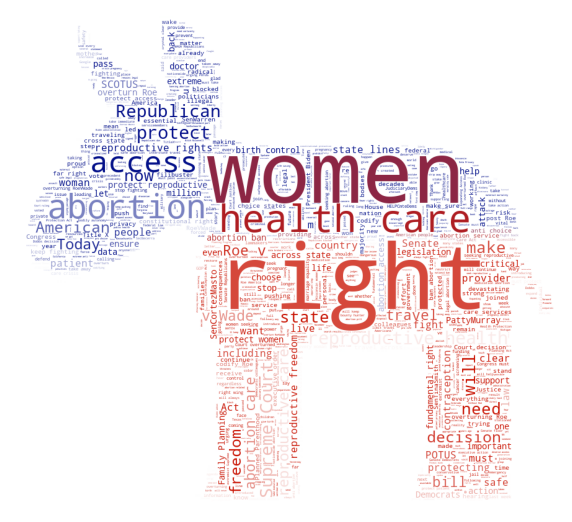

In [51]:
#Plotting
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.axis('off')
plt.show()

In [52]:
#Barcharts

In [53]:
! pip install matplotlib

In [114]:
#map

In [116]:
! pip install plotly
! pip install cufflinks
import ploty.ploty as py
import ploty.tools as tls

     |████████████████████████████████| 81 kB 1.7 MB/s eta 0:00:011
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67918 sha256=b425685db65227361b911a93dd5b4ccbefd3b18c9872bcd8858dd62c30181d36
  Stored in directory: /Users/nikitaolefir/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


ModuleNotFoundError: No module named 'ploty'

In [ ]:
tls.set_credentials_file(username='bigdatagal', api_key = 'hvginf')